## Importaciones

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve, validation_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

# Importar métricas y validación cruzada
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


ModuleNotFoundError: No module named 'xgboost'

## Tipos de datos 

In [ ]:
data = pd.read_csv("data/IA_PROPENSITY_TRAIN.csv", index_col=0)
data.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,NO DATA,Averia muy grave,SI,208,2892,0,0,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,SI,No,NO,245,1376,7187,0,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,...,NO DATA,No,NO,251,1376,0,1,4,21,3
CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,...,SI,Averia muy grave,SI,243,2015,7256,1,4,48,5
CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,...,NO DATA,No,NO,23,1818,0,1,3,21,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58049 entries, CLI1 to CLI58048
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCTO         58049 non-null  object
 1   TIPO_CARROCERIA  58049 non-null  object
 2   COMBUSTIBLE      58049 non-null  object
 3   Potencia         58049 non-null  object
 4   TRANS            58049 non-null  object
 5   FORMA_PAGO       58049 non-null  object
 6   ESTADO_CIVIL     57159 non-null  object
 7   GENERO           57189 non-null  object
 8   OcupaciOn        58049 non-null  object
 9   PROVINCIA        58049 non-null  object
 10  Campanna1        58049 non-null  object
 11  Campanna2        58049 non-null  object
 12  Campanna3        58049 non-null  object
 13  Zona_Renta       44871 non-null  object
 14  REV_Garantia     58049 non-null  object
 15  Averia_grave     58048 non-null  object
 16  QUEJA_CAC        58049 non-null  object
 17  EDAD_COCHE       58049 non-nul

In [ ]:
data.describe(include='all')

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
count,58049,58049,58049,58049,58049,58049,57159,57189,58049,58049,...,58049,58048,58049,58049.000000,58049.000000,58049.000000,58049.000000,58049.000000,58049.000000,58049.000000
unique,11,8,2,3,2,4,4,2,3,53,...,2,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,TIPO1,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Madrid,...,NO DATA,No,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15993,23387,33085,39906,52969,30190,43529,40170,53262,10874,...,32011,29935,36268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,469.247050,2540.125756,11805.893607,0.291857,3.529587,47.351255,1.859119
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,308.121789,1603.556511,10205.363971,0.454621,2.528413,11.239984,3.091309
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,193.000000,1595.000000,0.000000,0.000000,1.000000,40.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,382.000000,2353.000000,11486.000000,0.000000,3.000000,48.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,778.000000,3301.000000,17927.000000,1.000000,5.000000,56.000000,4.000000


## EDA (Analisis exploratorio de datos )

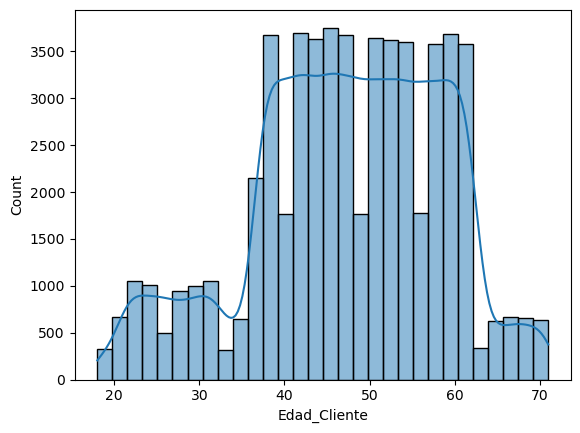

In [ ]:
# Vamos a ver cuales son los numeros de la edad de los clientes 
sns.histplot(data["Edad_Cliente"], bins=30, kde=True)
plt.show()

In [ ]:
'''

# Creamos listas con los valores y etiquetas
sizes = [num_mas_1_coche, num_no_mas_1_coche]
labels = ['Más de 1 coche', '1 o menos coche']

# Graficamos el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Distribución de personas según número de coches")
plt.show()'''

'\n\n# Creamos listas con los valores y etiquetas\nsizes = [num_mas_1_coche, num_no_mas_1_coche]\nlabels = [\'Más de 1 coche\', \'1 o menos coche\']\n\n# Graficamos el diagrama de pastel\nplt.figure(figsize=(8, 8))\nplt.pie(sizes, labels=labels, autopct=\'%1.1f%%\', startangle=90, colors=[\'#66b3ff\', \'#ff9999\'])\nplt.title("Distribución de personas según número de coches")\nplt.show()'

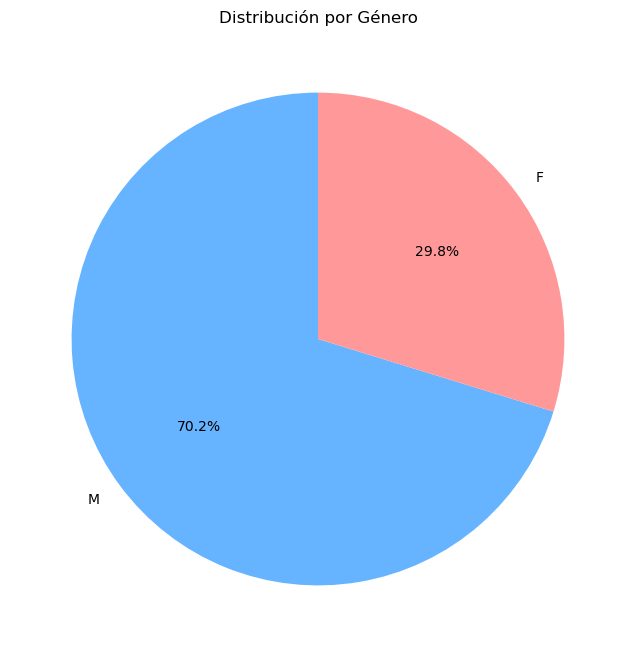

In [ ]:
conteo_genero = data['GENERO'].value_counts()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_genero, 
        labels=conteo_genero.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'])  # Puedes ajustar los colores según el número de categorías
plt.title("Distribución por Género")
plt.show()

## Limpieza de datos

### Manejo de datos nulos y duplicados

In [ ]:
data.isnull().sum()

PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia               0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona_Renta         13178
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
EDAD_COCHE             0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad_Cliente           0
Tiempo                 0
dtype: int64

In [ ]:
moda_zona_renta = data['Zona_Renta'].mode()[0]
data['Zona_Renta'] = data['Zona_Renta'].fillna(moda_zona_renta)


In [ ]:
data.dropna(subset=['ESTADO_CIVIL', 'GENERO', 'Averia_grave'], inplace=True)

In [ ]:
data.shape

(57154, 24)

In [ ]:
data.duplicated().sum()

14

In [ ]:
data = data.drop_duplicates()
data.shape

(57140, 24)

### Codificación de variables categóricas y continuas

In [ ]:
v_continuas = []
v_categoricas = []
for col in data.columns:
    if data[col].nunique() > 10 and data[col].dtypes in ['float64', 'int64']:
        v_continuas.append(col)
    else:
        v_categoricas.append(col)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: EDAD_COCHE, COSTE_VENTA, km_anno, Revisiones, Edad_Cliente, Tiempo
Variables categóricas: PRODUCTO, TIPO_CARROCERIA, COMBUSTIBLE, Potencia, TRANS, FORMA_PAGO, ESTADO_CIVIL, GENERO, OcupaciOn, PROVINCIA, Campanna1, Campanna2, Campanna3, Zona_Renta, REV_Garantia, Averia_grave, QUEJA_CAC, Mas_1_coche


#### Categoricas

In [ ]:
data[v_categoricas].head(3)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,Mas_1_coche
CODE,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,1


In [ ]:

data[v_categoricas].nunique()

PRODUCTO           11
TIPO_CARROCERIA     8
COMBUSTIBLE         2
Potencia            3
TRANS               2
FORMA_PAGO          4
ESTADO_CIVIL        4
GENERO              2
OcupaciOn           3
PROVINCIA          53
Campanna1           2
Campanna2           2
Campanna3           2
Zona_Renta          4
REV_Garantia        2
Averia_grave        4
QUEJA_CAC           2
Mas_1_coche         2
dtype: int64

In [ ]:
data[v_categoricas].describe()


,Mas_1_coche
count,57140.000000
mean,0.291267
std,0.454350
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
print('Valores únicos de las variables categóricas:')
for col in v_categoricas:
    print(f"- {col}: {data[col].unique()}")

Valores únicos de las variables categóricas:
- PRODUCTO: ['A' 'B' 'C' 'H' 'J' 'D' 'I' 'E' 'F' 'K' 'G']
- TIPO_CARROCERIA: ['TIPO1' 'TIPO6' 'TIPO4' 'TIPO7' 'TIPO8' 'TIPO2' 'TIPO3' 'TIPO5']
- COMBUSTIBLE: ['FUEL 1' 'FUEL 2']
- Potencia: ['Baja' 'Media' 'Alta']
- TRANS: ['M' 'A']
- FORMA_PAGO: ['Contado' 'Otros' 'Financiera Marca' 'Financiera Banco']
- ESTADO_CIVIL: ['CASADO' 'SOLTERO' 'OTROS' 'EN PAREJA']
- GENERO: ['M' 'F']
- OcupaciOn: ['Empresa' 'Funcionario' 'Autonomo']
- PROVINCIA: ['Asturias' 'Toledo' 'Lerida' 'Madrid' 'Santa Cruz de Tenerife'
 'Pontevedra' 'Lacoruna' 'Barcelona' 'Cordoba' 'Guipuzcua' 'Valladolid'
 'Castellon' 'Valencia' 'Las Palmas' 'La Rioja' 'Baleares' 'Zaragoza'
 'Alicante' 'Tarragona' 'Leon' 'Lugo' 'Badajoz' 'Vizcaya' 'Sevilla'
 'Guadalajara' 'Ciudad Real' 'Cantabria' 'Orense' 'Navarra' 'Gerona'
 'Malaga' 'Jaen' 'Murcia' 'Burgos' 'Granada' 'Alava' 'Cuenca' 'Cadiz'
 'Salamanca' 'Albacete' 'Almeria' 'Teruel' 'Segovia' 'Palencia' 'Huelva'
 'Huesca' 'Zamora' 'Avil

##### Label encoder 

In [ ]:
columnas_no_numericas = data.select_dtypes(exclude=['number']).columns
print(columnas_no_numericas)

Index(['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS',
       'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA',
       'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia',
       'Averia_grave', 'QUEJA_CAC'],
      dtype='object')


In [ ]:
data.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,NO DATA,Averia muy grave,SI,208,2892,0,0,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,SI,No,NO,245,1376,7187,0,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,...,NO DATA,No,NO,251,1376,0,1,4,21,3
CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,...,SI,Averia muy grave,SI,243,2015,7256,1,4,48,5
CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,...,NO DATA,No,NO,23,1818,0,1,3,21,3


In [ ]:
columnas_categoricas = ['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'OcupaciOn', 'Campanna1', 'Campanna2', 'Campanna3', 'REV_Garantia', 'QUEJA_CAC', 'GENERO', 'PROVINCIA'] # potencia deberia de ser ordinal? Zona renta
encoders = {}  # Diccionario para guardar los encoders

for col in columnas_categoricas:
    le = LabelEncoder()  # Crear un LabelEncoder por cada columna
    data[col] = le.fit_transform(data[col])  # Aplicarlo a la columna
    encoders[col] = le  # Guardarlo en el diccionario

data.head()


,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,Baja,1,0,0,1,1,4,...,0,Averia muy grave,1,208,2892,0,0,2,18,0
CLI2,0,0,0,Baja,1,0,0,0,1,47,...,1,No,0,245,1376,7187,0,2,53,0
CLI3,0,0,0,Baja,1,3,0,1,1,30,...,0,No,0,251,1376,0,1,4,21,3
CLI4,0,0,0,Baja,1,2,0,0,1,32,...,1,Averia muy grave,1,243,2015,7256,1,4,48,5
CLI5,0,0,0,Baja,1,2,0,0,2,41,...,0,No,0,23,1818,0,1,3,21,3


#### Ordinal encoder 


In [ ]:
columnas_ordinales = ['Potencia', 'Zona_Renta', 'Averia_grave' ]
for col in columnas_ordinales:
    print(f'{col}: {data[col].unique()} ')

Potencia: ['Baja' 'Media' 'Alta'] 
Zona_Renta: ['Medio-Bajo' 'Medio' 'Alto' 'Otros'] 
Averia_grave: ['Averia muy grave' 'No' 'Averia leve' 'Averia grave'] 


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Definir el orden manualmente para cada columna
ordenes = {
    'Potencia': ['Baja', 'Media', 'Alta'],  # Ejemplo de niveles de potencia
    'Zona_Renta': ['Otros', 'Medio-Bajo', 'Medio', 'Alto' ],  # Orden definido por ti
    'Averia_grave': [ 'No', 'Averia leve', 'Averia grave', 'Averia muy grave']  # Si es ordinal, puedes definir el orden como deseesbinaria, 'No' puede ser 0 y 'Sí' 1
}

# Crear el OrdinalEncoder con el orden especificado
ordinal_encoder = OrdinalEncoder(categories=[ordenes[col] for col in columnas_ordinales])

# Aplicar la transformación
data[columnas_ordinales] = ordinal_encoder.fit_transform(data[columnas_ordinales])

# Verificar resultado
data[columnas_ordinales].head()

,Potencia,Zona_Renta,Averia_grave
CODE,,,
CLI1,0.0,1.0,3.0
CLI2,0.0,1.0,0.0
CLI3,0.0,2.0,0.0
CLI4,0.0,2.0,3.0
CLI5,0.0,3.0,0.0


##### Continuas


In [ ]:
def outliers_IQR(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.10)
        Q3 = df[col].quantile(0.90)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Contar valores atípicos
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        # Eliminar outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df, outliers

In [ ]:
data, outliers_detectados = outliers_IQR(data, v_continuas)
print("Valores atípicos detectados:")
for col, count in outliers_detectados.items():
    print(f"- {col}: {count}")

Valores atípicos detectados:
- EDAD_COCHE: 0
- COSTE_VENTA: 38
- km_anno: 59
- Revisiones: 0
- Edad_Cliente: 0
- Tiempo: 0


In [ ]:

data.shape[0] # Filas tras eliminar outliers.

57043

#### Manejo de valores nulos

In [ ]:
print(data.isnull().sum())  # Ver cuántos valores nulos hay por columna


PRODUCTO           0
TIPO_CARROCERIA    0
COMBUSTIBLE        0
Potencia           0
TRANS              0
FORMA_PAGO         0
ESTADO_CIVIL       0
GENERO             0
OcupaciOn          0
PROVINCIA          0
Campanna1          0
Campanna2          0
Campanna3          0
Zona_Renta         0
REV_Garantia       0
Averia_grave       0
QUEJA_CAC          0
EDAD_COCHE         0
COSTE_VENTA        0
km_anno            0
Mas_1_coche        0
Revisiones         0
Edad_Cliente       0
Tiempo             0
dtype: int64


In [75]:
print(len(data))

57043


Lo que vamos a hacer es que como hay demasiados datos nulos, aproximadamente 13.200 y eliminar todas las filas con valores nulos supondria eliminar mas de un 20% de los datos, vamos a rellenar los datos nulos con la mediana de la columna correspondiente.

#### Random forest 

,criterion,max_depth,min_samples_split,min_samples_leaf,n_estimators,accuracy,f1_score,recall,roc_auc,cv_score,train_score,overfitting
8,entropy,7,5,1,500,0.784118,0.749626,0.784118,0.873377,0.781106,0.784634,OK
9,entropy,7,5,1,500,0.784118,0.749626,0.784118,0.873377,0.781106,0.784634,OK
6,entropy,7,2,2,500,0.783680,0.748865,0.783680,0.873720,0.780602,0.784766,OK


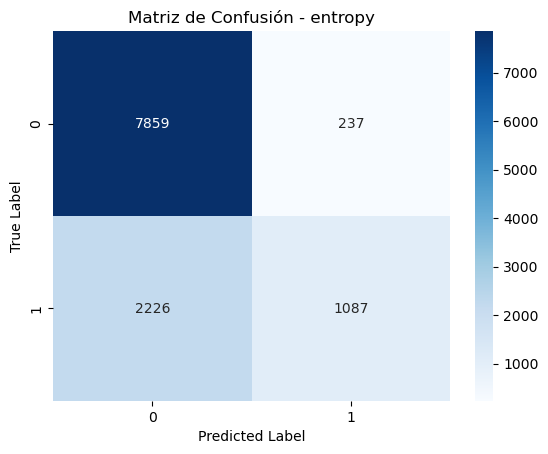

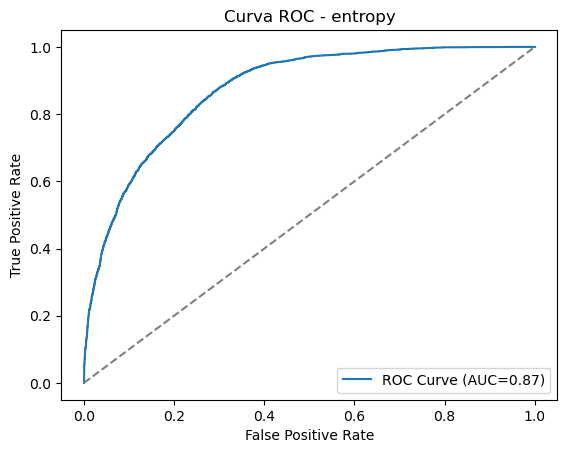

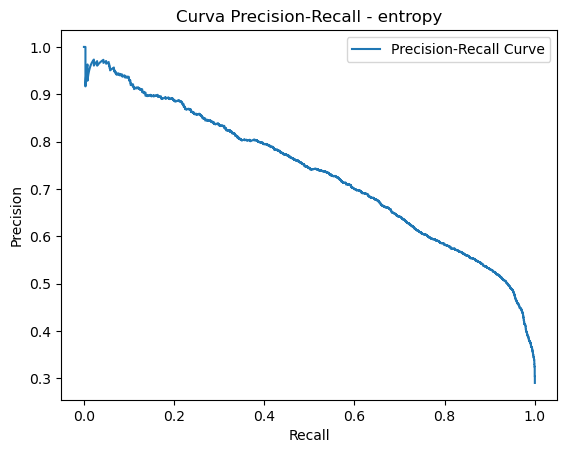

In [76]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_recall_curve
)

# Ignorar advertencias innecesarias
import warnings
warnings.filterwarnings("ignore")


# Definir variables
TARGET = "Mas_1_coche"  # Nombre de la variable objetivo
FEATURES = [col for col in data.columns if col != TARGET and col != "CODE" and col != "Tiempo"] 

X = data[FEATURES]
y = data[TARGET]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir hiperparámetros a iterar
param_grid = {
    'n_estimators': [500],
    'max_depth': [7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True, False],
    'class_weight': [None],
    'max_leaf_nodes': [None],
    'warm_start': [False, True],
    'criterion': ['entropy']
}

# Almacenar resultados
results = []

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid.values()):
    (
        n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features,
        bootstrap, class_weight, max_leaf_nodes, warm_start, criterion
    ) = params

    # Construir el modelo con los hiperparámetros actuales
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        class_weight=class_weight,
        max_leaf_nodes=max_leaf_nodes,
        warm_start=warm_start,
        criterion=criterion,
        random_state=42,
        n_jobs=-1  # Usa todos los núcleos disponibles para acelerar
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    # Calcular Train Score
    train_score = model.score(X_train, y_train)
    
    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Guardar los resultados
    results.append({
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'n_estimators': n_estimators,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

# Visualizar los mejores modelos
from IPython.display import display
display(best_models)

# Matriz de confusión y Curvas ROC/Precision-Recall del mejor modelo
best_model_params = best_models.iloc[0].to_dict()
best_model = RandomForestClassifier(
    n_estimators=best_model_params["n_estimators"],
    max_depth=best_model_params["max_depth"],
    min_samples_split=best_model_params["min_samples_split"],
    min_samples_leaf=best_model_params["min_samples_leaf"],
    criterion=best_model_params["criterion"],
    random_state=42
)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Matriz de Confusión
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Matriz de Confusión - {best_model_params["criterion"]}')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Curva ROC - {best_model_params["criterion"]}')
plt.legend()
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Curva Precision-Recall - {best_model_params["criterion"]}')
plt.legend()
plt.show()
